In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from collections import Counter

In [9]:
df=pd.read_excel("Sample.xls")

In [7]:
pip install xlrd

   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ------------ --------------------------- 30.7/96.5 kB 435.7 kB/s eta 0:00:01
   ---------------- ----------------------- 41.0/96.5 kB 393.8 kB/s eta 0:00:01
   --------------------------------- ------ 81.9/96.5 kB 573.4 kB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 553.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
df.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30


In [11]:
df.shape

(8399, 21)

In [12]:
df.tail()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
8394,7765,55558,2010-08-09,Medium,8,1294.0400,0.05,Delivery Truck,-323.180,150.98,...,Mick Brown,Alberta,West,Consumer,Furniture,Bookcases,Bush Mission Pointe Library,Jumbo Box,0.65,2010-08-09
8395,7766,55558,2010-08-09,Medium,23,392.5700,0.04,Regular Air,22.250,17.07,...,Mick Brown,Alberta,West,Consumer,Office Supplies,Envelopes,Recycled Interoffice Envelopes with Re-Use-A-S...,Small Box,0.38,2010-08-11
8396,7906,56550,2011-04-08,Not Specified,37,823.7800,0.03,Express Air,343.050,22.23,...,Frank Hawley,Alberta,West,Home Office,Furniture,Office Furnishings,"Executive Impressions 14""",Small Pack,0.41,2011-04-10
8397,7907,56550,2011-04-08,Not Specified,8,469.8375,0.00,Regular Air,-159.236,65.99,...,Frank Hawley,Alberta,West,Home Office,Technology,Telephones and Communication,Talkabout T8367,Small Box,0.56,2011-04-09
8398,7914,56581,2009-02-08,High,20,2026.0100,0.10,Express Air,580.430,105.98,...,Grant Donatelli,Alberta,West,Consumer,Furniture,Office Furnishings,"Tenex 46"" x 60"" Computer Anti-Static Chairmat,...",Medium Box,0.65,2009-02-11


In [13]:
df["Profit"]

0       -213.2500
1        457.8100
2         46.7075
3       1198.9710
4         30.9400
          ...    
8394    -323.1800
8395      22.2500
8396     343.0500
8397    -159.2360
8398     580.4300
Name: Profit, Length: 8399, dtype: float64

In [14]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
       'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
       'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin',
       'Ship Date'],
      dtype='object')

In [15]:
df.shape

(8399, 21)

Text(0, 0.5, 'Profit')

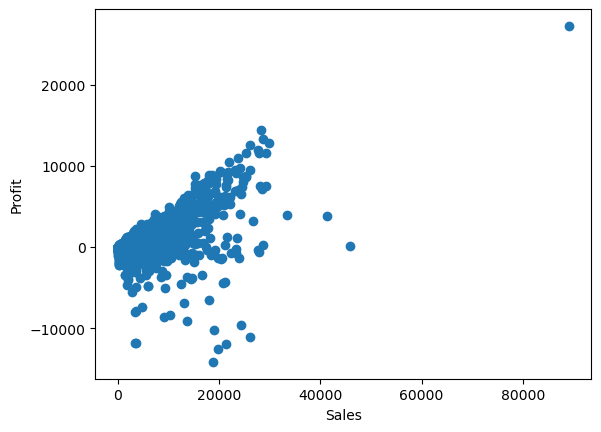

In [19]:
plt.scatter(df.Sales,df.Profit)
plt.xlabel("Sales")
plt.ylabel("Profit")

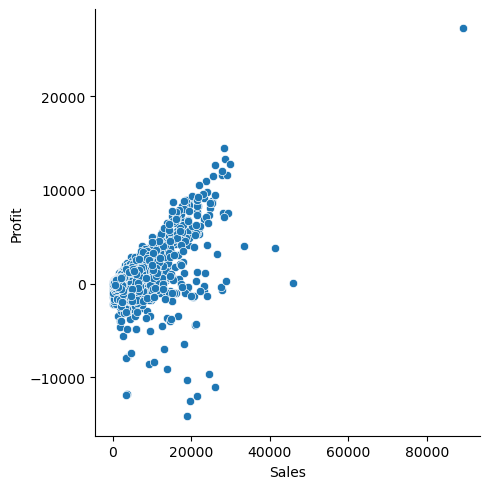

In [25]:
sns.relplot(x="Sales", y="Profit", data=df)
plt.show()

In [26]:
df["Order Priority"].value_counts()

Order Priority
High             1768
Low              1720
Not Specified    1672
Medium           1631
Critical         1608
Name: count, dtype: int64

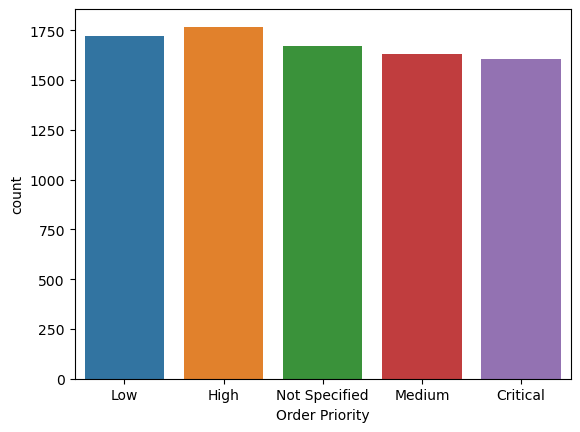

In [28]:
sns.countplot(x="Order Priority", data=df)
plt.show()

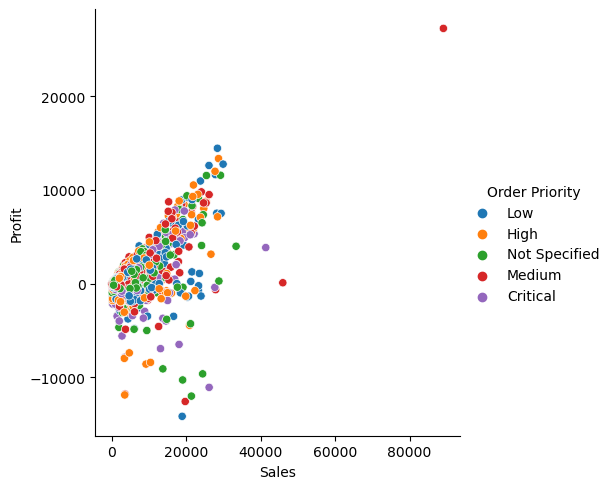

In [30]:
sns.relplot(x="Sales", y="Profit", data=df, hue="Order Priority")

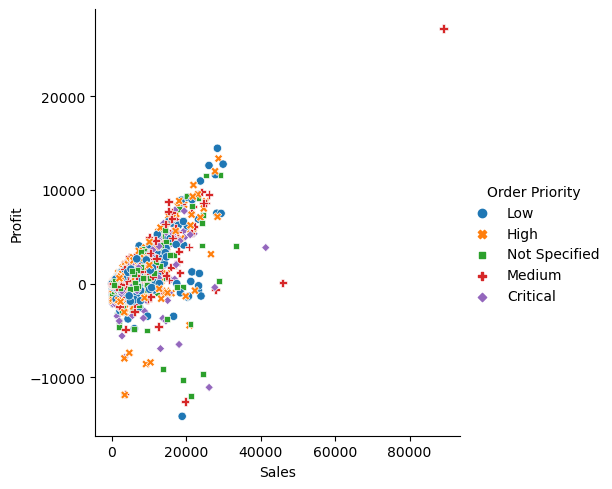

In [32]:
sns.relplot(x="Sales", y="Profit", data=df, hue="Order Priority", style="Order Priority")

In [34]:
df["Ship Mode"].value_counts()

Ship Mode
Regular Air       6270
Delivery Truck    1146
Express Air        983
Name: count, dtype: int64

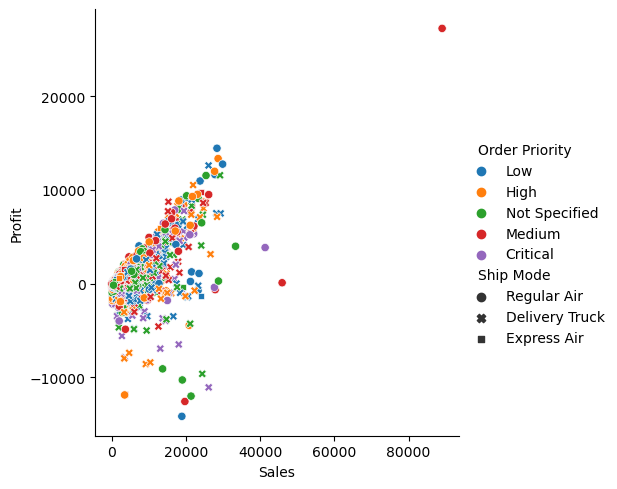

In [35]:
sns.relplot(x="Sales", y="Profit", data=df, hue="Order Priority", style="Ship Mode")

In [36]:
df["Year"]=df["Order Date"].dt.year

In [38]:
df.Year.head()

0    2010
1    2012
2    2012
3    2011
4    2010
Name: Year, dtype: int32

In [39]:
df.shape

(8399, 22)

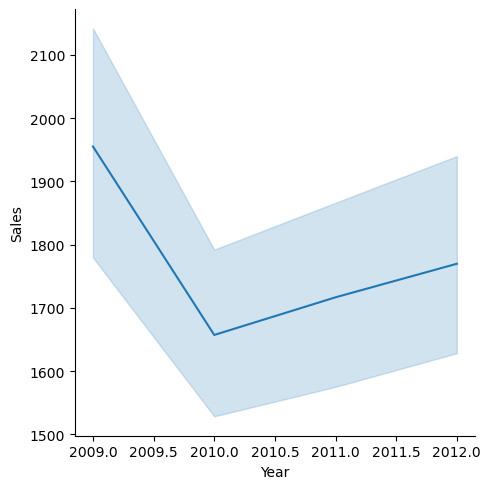

In [43]:
sns.relplot(x="Year", y="Sales", data=df, kind="line")

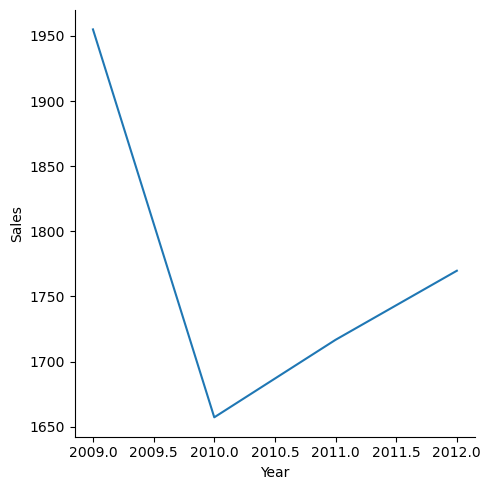

In [44]:
sns.relplot(x="Year", y="Sales", data=df, kind="line", ci=None)